In [0]:
library(tidyverse)
if (!require(devtools)) {
    install.packages('devtools')
}
devtools::install_github('erocoar/gghalves')
library(gghalves)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: devtools

Loading required package: usethis

Skipping install of 'gghalves' from a github remote, the SHA1 (ab17fa44) has not changed since last install.
  Use `force = TRUE` to force installation



In [0]:
na_full = read.csv("./full_table.csv")
attach(na_full)

The following objects are masked from na_full (pos = 6):

    Banned.visits.to.long.term.care.homes, cases_APR_to_MAY,
    cases_MAR_to_APR, Closed.cannabis.and.liquor.stores,
    Closed.daycares, Closed.gyms, Closed.movie.theaters,
    Closed.non.essential.businesses,
    Closed.restaurants.except.take.out, Declared.state.of.emergency,
    Employee.Face.Mask.Mandate, Employee.Screening, Froze.evictions,
    Large.Gathering.ban, MoM.Growth, Ordered.Closure.of.K.12.schools,
    Ordered.freezing.utility.shut.offs, percentage_infected_MAY,
    Public.Face.Mask.Mandate, State.Province, Travel.Restriction,
    YoY.Growth


The following objects are masked from na_full (pos = 7):

    Banned.visits.to.long.term.care.homes, cases_APR_to_MAY,
    cases_MAR_to_APR, Closed.cannabis.and.liquor.stores,
    Closed.daycares, Closed.gyms, Closed.movie.theaters,
    Closed.non.essential.businesses,
    Closed.restaurants.except.take.out, Declared.state.of.emergency,
    Employee.Face.Mask.Mandate, Emp

In [0]:
head(na_full)

,State.Province,cases_MAR_to_APR,cases_APR_to_MAY,percentage_infected_MAY,YoY.Growth,MoM.Growth,Declared.state.of.emergency,Ordered.Closure.of.K.12.schools,Closed.daycares,Banned.visits.to.long.term.care.homes,⋯,Closed.cannabis.and.liquor.stores,Closed.gyms,Closed.movie.theaters,Froze.evictions,Ordered.freezing.utility.shut.offs,Public.Face.Mask.Mandate,Employee.Face.Mask.Mandate,Travel.Restriction,Large.Gathering.ban,Employee.Screening
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alabama,18339.130,168.16788,2.3195127,298.6612,323.53740,1,1,1,1,⋯,1,1,1,0,0,0,1,0,1,0
2,Alaska,29000.000,33.33333,0.5303843,104.5563,142.48127,1,1,0,0,⋯,1,1,1,1,1,0,1,1,1,0
3,Arizona,30376.923,232.38263,1.8092474,162.8740,103.26670,1,1,0,0,⋯,1,1,1,0,0,0,1,1,1,0
4,Arkansas,9893.750,179.11194,1.4788899,178.0737,92.12081,1,1,0,1,⋯,1,1,0,0,1,0,1,1,1,1
5,California,5570.921,184.11480,1.9491437,257.7773,174.22880,1,0,0,0,⋯,1,1,1,1,1,0,1,0,1,1
6,Colorado,5988.235,156.12319,3.6825790,283.0833,112.05777,1,1,0,1,⋯,1,1,1,0,1,0,1,0,1,1


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.




Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-219.63  -83.64  -26.56   74.03  543.54 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    92.59      49.72   1.862   0.0679 .
X             140.55      53.09   2.647   0.0106 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 131.6 on 55 degrees of freedom
Multiple R-squared:  0.113,	Adjusted R-squared:  0.0969 
F-statistic: 7.009 on 1 and 55 DF,  p-value: 0.01056


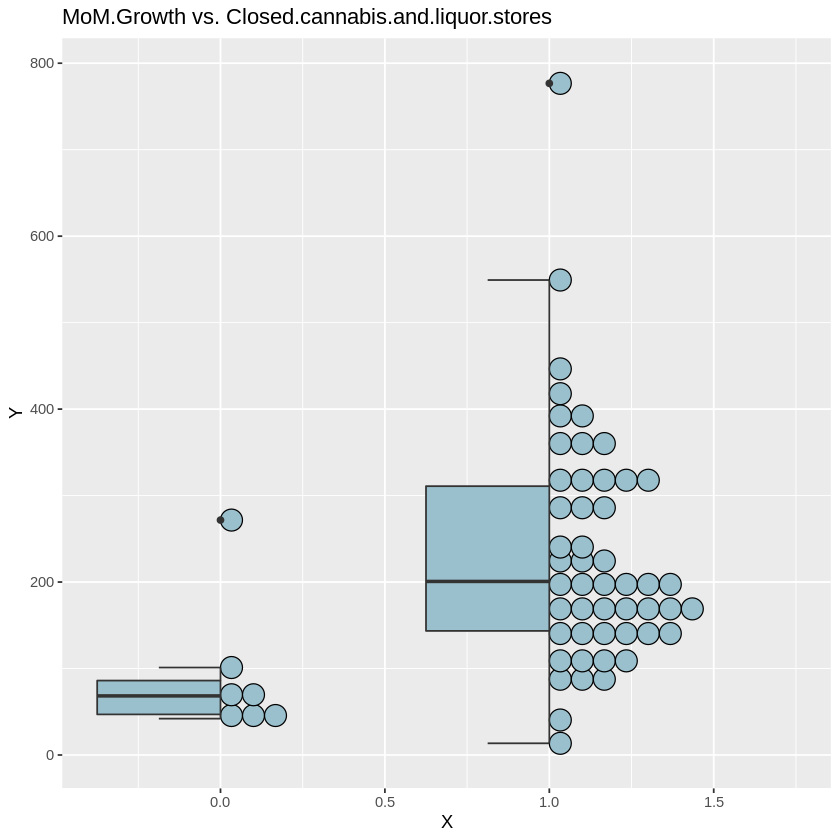

In [0]:
Y <- MoM.Growth
X <- Closed.cannabis.and.liquor.stores

na_full %>% 
	ggplot(aes(x = X, y = Y, group = X)) + 
  geom_half_dotplot(fill = "lightblue3") + 
  geom_half_boxplot(side="l", fill = "lightblue3") +
	ggtitle("MoM.Growth vs. Closed.cannabis.and.liquor.stores")

summary(lm(Y ~ X))

In [0]:
jpeg("cases_MAR_to_APR vs. Declared.state.of.emergency.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Declared.state.of.emergency, y = cases_MAR_to_APR, group = Declared.state.of.emergency)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Declared.state.of.emergency")
dev.off()
jpeg("cases_MAR_to_APR vs. Ordered.Closure.of.K.12.schools.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Ordered.Closure.of.K.12.schools, y = cases_MAR_to_APR, group = Ordered.Closure.of.K.12.schools)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Ordered.Closure.of.K.12.schools")
dev.off()
jpeg("cases_MAR_to_APR vs. Closed.daycares.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.daycares, y = cases_MAR_to_APR, group = Closed.daycares)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Closed.daycares")
dev.off()
jpeg("cases_MAR_to_APR vs. Banned.visits.to.long.term.care.homes.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Banned.visits.to.long.term.care.homes, y = cases_MAR_to_APR, group = Banned.visits.to.long.term.care.homes)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Banned.visits.to.long.term.care.homes")
dev.off()
jpeg("cases_MAR_to_APR vs. Closed.non.essential.businesses.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.non.essential.businesses, y = cases_MAR_to_APR, group = Closed.non.essential.businesses)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Closed.non.essential.businesses")
dev.off()
jpeg("cases_MAR_to_APR vs. Closed.restaurants.except.take.out.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.restaurants.except.take.out, y = cases_MAR_to_APR, group = Closed.restaurants.except.take.out)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Closed.restaurants.except.take.out")
dev.off()
jpeg("cases_MAR_to_APR vs. Closed.cannabis.and.liquor.stores.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.cannabis.and.liquor.stores, y = cases_MAR_to_APR, group = Closed.cannabis.and.liquor.stores)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Closed.cannabis.and.liquor.stores")
dev.off()
jpeg("cases_MAR_to_APR vs. Closed.gyms.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.gyms, y = cases_MAR_to_APR, group = Closed.gyms)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Closed.gyms")
dev.off()
jpeg("cases_MAR_to_APR vs. Closed.movie.theaters.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.movie.theaters, y = cases_MAR_to_APR, group = Closed.movie.theaters)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Closed.movie.theaters")
dev.off()
jpeg("cases_MAR_to_APR vs. Froze.evictions.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Froze.evictions, y = cases_MAR_to_APR, group = Froze.evictions)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Froze.evictions")
dev.off()
jpeg("cases_MAR_to_APR vs. Ordered.freezing.utility.shut.offs.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Ordered.freezing.utility.shut.offs, y = cases_MAR_to_APR, group = Ordered.freezing.utility.shut.offs)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Ordered.freezing.utility.shut.offs")
dev.off()
jpeg("cases_MAR_to_APR vs. Public.Face.Mask.Mandate.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Public.Face.Mask.Mandate, y = cases_MAR_to_APR, group = Public.Face.Mask.Mandate)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Public.Face.Mask.Mandate")
dev.off()
jpeg("cases_MAR_to_APR vs. Employee.Face.Mask.Mandate.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Employee.Face.Mask.Mandate, y = cases_MAR_to_APR, group = Employee.Face.Mask.Mandate)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Employee.Face.Mask.Mandate")
dev.off()
jpeg("cases_MAR_to_APR vs. Travel.Restriction.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Travel.Restriction, y = cases_MAR_to_APR, group = Travel.Restriction)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Travel.Restriction")
dev.off()
jpeg("cases_MAR_to_APR vs. Large.Gathering.ban.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Large.Gathering.ban, y = cases_MAR_to_APR, group = Large.Gathering.ban)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Large.Gathering.ban")
dev.off()
jpeg("cases_MAR_to_APR vs. Employee.Screening.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Employee.Screening, y = cases_MAR_to_APR, group = Employee.Screening)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_MAR_to_APR vs. Employee.Screening")
dev.off()
jpeg("cases_APR_to_MAY vs. Declared.state.of.emergency.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Declared.state.of.emergency, y = cases_APR_to_MAY, group = Declared.state.of.emergency)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Declared.state.of.emergency")
dev.off()
jpeg("cases_APR_to_MAY vs. Ordered.Closure.of.K.12.schools.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Ordered.Closure.of.K.12.schools, y = cases_APR_to_MAY, group = Ordered.Closure.of.K.12.schools)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Ordered.Closure.of.K.12.schools")
dev.off()
jpeg("cases_APR_to_MAY vs. Closed.daycares.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.daycares, y = cases_APR_to_MAY, group = Closed.daycares)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Closed.daycares")
dev.off()
jpeg("cases_APR_to_MAY vs. Banned.visits.to.long.term.care.homes.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Banned.visits.to.long.term.care.homes, y = cases_APR_to_MAY, group = Banned.visits.to.long.term.care.homes)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Banned.visits.to.long.term.care.homes")
dev.off()
jpeg("cases_APR_to_MAY vs. Closed.non.essential.businesses.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.non.essential.businesses, y = cases_APR_to_MAY, group = Closed.non.essential.businesses)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Closed.non.essential.businesses")
dev.off()
jpeg("cases_APR_to_MAY vs. Closed.restaurants.except.take.out.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.restaurants.except.take.out, y = cases_APR_to_MAY, group = Closed.restaurants.except.take.out)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Closed.restaurants.except.take.out")
dev.off()
jpeg("cases_APR_to_MAY vs. Closed.cannabis.and.liquor.stores.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.cannabis.and.liquor.stores, y = cases_APR_to_MAY, group = Closed.cannabis.and.liquor.stores)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Closed.cannabis.and.liquor.stores")
dev.off()
jpeg("cases_APR_to_MAY vs. Closed.gyms.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.gyms, y = cases_APR_to_MAY, group = Closed.gyms)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Closed.gyms")
dev.off()
jpeg("cases_APR_to_MAY vs. Closed.movie.theaters.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.movie.theaters, y = cases_APR_to_MAY, group = Closed.movie.theaters)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Closed.movie.theaters")
dev.off()
jpeg("cases_APR_to_MAY vs. Froze.evictions.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Froze.evictions, y = cases_APR_to_MAY, group = Froze.evictions)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Froze.evictions")
dev.off()
jpeg("cases_APR_to_MAY vs. Ordered.freezing.utility.shut.offs.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Ordered.freezing.utility.shut.offs, y = cases_APR_to_MAY, group = Ordered.freezing.utility.shut.offs)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Ordered.freezing.utility.shut.offs")
dev.off()
jpeg("cases_APR_to_MAY vs. Public.Face.Mask.Mandate.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Public.Face.Mask.Mandate, y = cases_APR_to_MAY, group = Public.Face.Mask.Mandate)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Public.Face.Mask.Mandate")
dev.off()
jpeg("cases_APR_to_MAY vs. Employee.Face.Mask.Mandate.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Employee.Face.Mask.Mandate, y = cases_APR_to_MAY, group = Employee.Face.Mask.Mandate)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Employee.Face.Mask.Mandate")
dev.off()
jpeg("cases_APR_to_MAY vs. Travel.Restriction.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Travel.Restriction, y = cases_APR_to_MAY, group = Travel.Restriction)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Travel.Restriction")
dev.off()
jpeg("cases_APR_to_MAY vs. Large.Gathering.ban.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Large.Gathering.ban, y = cases_APR_to_MAY, group = Large.Gathering.ban)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Large.Gathering.ban")
dev.off()
jpeg("cases_APR_to_MAY vs. Employee.Screening.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Employee.Screening, y = cases_APR_to_MAY, group = Employee.Screening)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("cases_APR_to_MAY vs. Employee.Screening")
dev.off()
jpeg("percentage_infected_MAY vs. Declared.state.of.emergency.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Declared.state.of.emergency, y = percentage_infected_MAY, group = Declared.state.of.emergency)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Declared.state.of.emergency")
dev.off()
jpeg("percentage_infected_MAY vs. Ordered.Closure.of.K.12.schools.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Ordered.Closure.of.K.12.schools, y = percentage_infected_MAY, group = Ordered.Closure.of.K.12.schools)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Ordered.Closure.of.K.12.schools")
dev.off()
jpeg("percentage_infected_MAY vs. Closed.daycares.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.daycares, y = percentage_infected_MAY, group = Closed.daycares)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Closed.daycares")
dev.off()
jpeg("percentage_infected_MAY vs. Banned.visits.to.long.term.care.homes.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Banned.visits.to.long.term.care.homes, y = percentage_infected_MAY, group = Banned.visits.to.long.term.care.homes)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Banned.visits.to.long.term.care.homes")
dev.off()
jpeg("percentage_infected_MAY vs. Closed.non.essential.businesses.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.non.essential.businesses, y = percentage_infected_MAY, group = Closed.non.essential.businesses)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Closed.non.essential.businesses")
dev.off()
jpeg("percentage_infected_MAY vs. Closed.restaurants.except.take.out.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.restaurants.except.take.out, y = percentage_infected_MAY, group = Closed.restaurants.except.take.out)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Closed.restaurants.except.take.out")
dev.off()
jpeg("percentage_infected_MAY vs. Closed.cannabis.and.liquor.stores.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.cannabis.and.liquor.stores, y = percentage_infected_MAY, group = Closed.cannabis.and.liquor.stores)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Closed.cannabis.and.liquor.stores")
dev.off()
jpeg("percentage_infected_MAY vs. Closed.gyms.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.gyms, y = percentage_infected_MAY, group = Closed.gyms)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Closed.gyms")
dev.off()
jpeg("percentage_infected_MAY vs. Closed.movie.theaters.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.movie.theaters, y = percentage_infected_MAY, group = Closed.movie.theaters)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Closed.movie.theaters")
dev.off()
jpeg("percentage_infected_MAY vs. Froze.evictions.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Froze.evictions, y = percentage_infected_MAY, group = Froze.evictions)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Froze.evictions")
dev.off()
jpeg("percentage_infected_MAY vs. Ordered.freezing.utility.shut.offs.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Ordered.freezing.utility.shut.offs, y = percentage_infected_MAY, group = Ordered.freezing.utility.shut.offs)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Ordered.freezing.utility.shut.offs")
dev.off()
jpeg("percentage_infected_MAY vs. Public.Face.Mask.Mandate.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Public.Face.Mask.Mandate, y = percentage_infected_MAY, group = Public.Face.Mask.Mandate)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Public.Face.Mask.Mandate")
dev.off()
jpeg("percentage_infected_MAY vs. Employee.Face.Mask.Mandate.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Employee.Face.Mask.Mandate, y = percentage_infected_MAY, group = Employee.Face.Mask.Mandate)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Employee.Face.Mask.Mandate")
dev.off()
jpeg("percentage_infected_MAY vs. Travel.Restriction.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Travel.Restriction, y = percentage_infected_MAY, group = Travel.Restriction)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Travel.Restriction")
dev.off()
jpeg("percentage_infected_MAY vs. Large.Gathering.ban.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Large.Gathering.ban, y = percentage_infected_MAY, group = Large.Gathering.ban)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Large.Gathering.ban")
dev.off()
jpeg("percentage_infected_MAY vs. Employee.Screening.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Employee.Screening, y = percentage_infected_MAY, group = Employee.Screening)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("percentage_infected_MAY vs. Employee.Screening")
dev.off()
jpeg("YoY.Growth vs. Declared.state.of.emergency.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Declared.state.of.emergency, y = YoY.Growth, group = Declared.state.of.emergency)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Declared.state.of.emergency")
dev.off()
jpeg("YoY.Growth vs. Ordered.Closure.of.K.12.schools.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Ordered.Closure.of.K.12.schools, y = YoY.Growth, group = Ordered.Closure.of.K.12.schools)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Ordered.Closure.of.K.12.schools")
dev.off()
jpeg("YoY.Growth vs. Closed.daycares.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.daycares, y = YoY.Growth, group = Closed.daycares)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Closed.daycares")
dev.off()
jpeg("YoY.Growth vs. Banned.visits.to.long.term.care.homes.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Banned.visits.to.long.term.care.homes, y = YoY.Growth, group = Banned.visits.to.long.term.care.homes)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Banned.visits.to.long.term.care.homes")
dev.off()
jpeg("YoY.Growth vs. Closed.non.essential.businesses.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.non.essential.businesses, y = YoY.Growth, group = Closed.non.essential.businesses)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Closed.non.essential.businesses")
dev.off()
jpeg("YoY.Growth vs. Closed.restaurants.except.take.out.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.restaurants.except.take.out, y = YoY.Growth, group = Closed.restaurants.except.take.out)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Closed.restaurants.except.take.out")
dev.off()
jpeg("YoY.Growth vs. Closed.cannabis.and.liquor.stores.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.cannabis.and.liquor.stores, y = YoY.Growth, group = Closed.cannabis.and.liquor.stores)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Closed.cannabis.and.liquor.stores")
dev.off()
jpeg("YoY.Growth vs. Closed.gyms.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.gyms, y = YoY.Growth, group = Closed.gyms)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Closed.gyms")
dev.off()
jpeg("YoY.Growth vs. Closed.movie.theaters.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.movie.theaters, y = YoY.Growth, group = Closed.movie.theaters)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Closed.movie.theaters")
dev.off()
jpeg("YoY.Growth vs. Froze.evictions.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Froze.evictions, y = YoY.Growth, group = Froze.evictions)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Froze.evictions")
dev.off()
jpeg("YoY.Growth vs. Ordered.freezing.utility.shut.offs.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Ordered.freezing.utility.shut.offs, y = YoY.Growth, group = Ordered.freezing.utility.shut.offs)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Ordered.freezing.utility.shut.offs")
dev.off()
jpeg("YoY.Growth vs. Public.Face.Mask.Mandate.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Public.Face.Mask.Mandate, y = YoY.Growth, group = Public.Face.Mask.Mandate)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Public.Face.Mask.Mandate")
dev.off()
jpeg("YoY.Growth vs. Employee.Face.Mask.Mandate.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Employee.Face.Mask.Mandate, y = YoY.Growth, group = Employee.Face.Mask.Mandate)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Employee.Face.Mask.Mandate")
dev.off()
jpeg("YoY.Growth vs. Travel.Restriction.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Travel.Restriction, y = YoY.Growth, group = Travel.Restriction)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Travel.Restriction")
dev.off()
jpeg("YoY.Growth vs. Large.Gathering.ban.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Large.Gathering.ban, y = YoY.Growth, group = Large.Gathering.ban)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Large.Gathering.ban")
dev.off()
jpeg("YoY.Growth vs. Employee.Screening.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Employee.Screening, y = YoY.Growth, group = Employee.Screening)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("YoY.Growth vs. Employee.Screening")
dev.off()
jpeg("MoM.Growth vs. Declared.state.of.emergency.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Declared.state.of.emergency, y = MoM.Growth, group = Declared.state.of.emergency)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Declared.state.of.emergency")
dev.off()
jpeg("MoM.Growth vs. Ordered.Closure.of.K.12.schools.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Ordered.Closure.of.K.12.schools, y = MoM.Growth, group = Ordered.Closure.of.K.12.schools)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Ordered.Closure.of.K.12.schools")
dev.off()
jpeg("MoM.Growth vs. Closed.daycares.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.daycares, y = MoM.Growth, group = Closed.daycares)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Closed.daycares")
dev.off()
jpeg("MoM.Growth vs. Banned.visits.to.long.term.care.homes.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Banned.visits.to.long.term.care.homes, y = MoM.Growth, group = Banned.visits.to.long.term.care.homes)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Banned.visits.to.long.term.care.homes")
dev.off()
jpeg("MoM.Growth vs. Closed.non.essential.businesses.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.non.essential.businesses, y = MoM.Growth, group = Closed.non.essential.businesses)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Closed.non.essential.businesses")
dev.off()
jpeg("MoM.Growth vs. Closed.restaurants.except.take.out.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.restaurants.except.take.out, y = MoM.Growth, group = Closed.restaurants.except.take.out)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Closed.restaurants.except.take.out")
dev.off()
jpeg("MoM.Growth vs. Closed.cannabis.and.liquor.stores.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.cannabis.and.liquor.stores, y = MoM.Growth, group = Closed.cannabis.and.liquor.stores)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Closed.cannabis.and.liquor.stores")
dev.off()
jpeg("MoM.Growth vs. Closed.gyms.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.gyms, y = MoM.Growth, group = Closed.gyms)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Closed.gyms")
dev.off()
jpeg("MoM.Growth vs. Closed.movie.theaters.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Closed.movie.theaters, y = MoM.Growth, group = Closed.movie.theaters)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Closed.movie.theaters")
dev.off()
jpeg("MoM.Growth vs. Froze.evictions.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Froze.evictions, y = MoM.Growth, group = Froze.evictions)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Froze.evictions")
dev.off()
jpeg("MoM.Growth vs. Ordered.freezing.utility.shut.offs.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Ordered.freezing.utility.shut.offs, y = MoM.Growth, group = Ordered.freezing.utility.shut.offs)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Ordered.freezing.utility.shut.offs")
dev.off()
jpeg("MoM.Growth vs. Public.Face.Mask.Mandate.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Public.Face.Mask.Mandate, y = MoM.Growth, group = Public.Face.Mask.Mandate)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Public.Face.Mask.Mandate")
dev.off()
jpeg("MoM.Growth vs. Employee.Face.Mask.Mandate.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Employee.Face.Mask.Mandate, y = MoM.Growth, group = Employee.Face.Mask.Mandate)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Employee.Face.Mask.Mandate")
dev.off()
jpeg("MoM.Growth vs. Travel.Restriction.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Travel.Restriction, y = MoM.Growth, group = Travel.Restriction)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Travel.Restriction")
dev.off()
jpeg("MoM.Growth vs. Large.Gathering.ban.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Large.Gathering.ban, y = MoM.Growth, group = Large.Gathering.ban)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Large.Gathering.ban")
dev.off()
jpeg("MoM.Growth vs. Employee.Screening.jpeg", width = 1000, height = 1000) 
na_full %>% 
	ggplot(aes(x = Employee.Screening, y = MoM.Growth, group = Employee.Screening)) + 
	geom_half_dotplot(fill = "lightblue3") + 
	geom_half_boxplot(side="l", fill = "lightblue3") + 
	ggtitle("MoM.Growth vs. Employee.Screening")
dev.off()

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

In [0]:
summary(lm(cases_MAR_to_APR ~ Declared.state.of.emergency))
summary(lm(cases_APR_to_MAY ~ Declared.state.of.emergency))
summary(lm(percentage_infected_MAY ~ Declared.state.of.emergency))
summary(lm(YoY.Growth ~ Declared.state.of.emergency))
summary(lm(MoM.Growth ~ Declared.state.of.emergency))
summary(lm(cases_MAR_to_APR ~ Ordered.Closure.of.K.12.schools))
summary(lm(cases_APR_to_MAY ~ Ordered.Closure.of.K.12.schools))
summary(lm(percentage_infected_MAY ~ Ordered.Closure.of.K.12.schools))
summary(lm(YoY.Growth ~ Ordered.Closure.of.K.12.schools))
summary(lm(MoM.Growth ~ Ordered.Closure.of.K.12.schools))
summary(lm(cases_MAR_to_APR ~ Closed.daycares))
summary(lm(cases_APR_to_MAY ~ Closed.daycares))
summary(lm(percentage_infected_MAY ~ Closed.daycares))
summary(lm(YoY.Growth ~ Closed.daycares))
summary(lm(MoM.Growth ~ Closed.daycares))
summary(lm(cases_MAR_to_APR ~ Banned.visits.to.long.term.care.homes))
summary(lm(cases_APR_to_MAY ~ Banned.visits.to.long.term.care.homes))
summary(lm(percentage_infected_MAY ~ Banned.visits.to.long.term.care.homes))
summary(lm(YoY.Growth ~ Banned.visits.to.long.term.care.homes))
summary(lm(MoM.Growth ~ Banned.visits.to.long.term.care.homes))
summary(lm(cases_MAR_to_APR ~ Closed.non.essential.businesses))
summary(lm(cases_APR_to_MAY ~ Closed.non.essential.businesses))
summary(lm(percentage_infected_MAY ~ Closed.non.essential.businesses))
summary(lm(YoY.Growth ~ Closed.non.essential.businesses))
summary(lm(MoM.Growth ~ Closed.non.essential.businesses))
summary(lm(cases_MAR_to_APR ~ Closed.restaurants.except.take.out))
summary(lm(cases_APR_to_MAY ~ Closed.restaurants.except.take.out))
summary(lm(percentage_infected_MAY ~ Closed.restaurants.except.take.out))
summary(lm(YoY.Growth ~ Closed.restaurants.except.take.out))
summary(lm(MoM.Growth ~ Closed.restaurants.except.take.out))
summary(lm(cases_MAR_to_APR ~ Closed.cannabis.and.liquor.stores))
summary(lm(cases_APR_to_MAY ~ Closed.cannabis.and.liquor.stores))
summary(lm(percentage_infected_MAY ~ Closed.cannabis.and.liquor.stores))
summary(lm(YoY.Growth ~ Closed.cannabis.and.liquor.stores))
summary(lm(MoM.Growth ~ Closed.cannabis.and.liquor.stores))
summary(lm(cases_MAR_to_APR ~ Closed.gyms))
summary(lm(cases_APR_to_MAY ~ Closed.gyms))
summary(lm(percentage_infected_MAY ~ Closed.gyms))
summary(lm(YoY.Growth ~ Closed.gyms))
summary(lm(MoM.Growth ~ Closed.gyms))
summary(lm(cases_MAR_to_APR ~ Closed.movie.theaters))
summary(lm(cases_APR_to_MAY ~ Closed.movie.theaters))
summary(lm(percentage_infected_MAY ~ Closed.movie.theaters))
summary(lm(YoY.Growth ~ Closed.movie.theaters))
summary(lm(MoM.Growth ~ Closed.movie.theaters))
summary(lm(cases_MAR_to_APR ~ Froze.evictions))
summary(lm(cases_APR_to_MAY ~ Froze.evictions))
summary(lm(percentage_infected_MAY ~ Froze.evictions))
summary(lm(YoY.Growth ~ Froze.evictions))
summary(lm(MoM.Growth ~ Froze.evictions))
summary(lm(cases_MAR_to_APR ~ Ordered.freezing.utility.shut.offs))
summary(lm(cases_APR_to_MAY ~ Ordered.freezing.utility.shut.offs))
summary(lm(percentage_infected_MAY ~ Ordered.freezing.utility.shut.offs))
summary(lm(YoY.Growth ~ Ordered.freezing.utility.shut.offs))
summary(lm(MoM.Growth ~ Ordered.freezing.utility.shut.offs))
summary(lm(cases_MAR_to_APR ~ Public.Face.Mask.Mandate))
summary(lm(cases_APR_to_MAY ~ Public.Face.Mask.Mandate))
summary(lm(percentage_infected_MAY ~ Public.Face.Mask.Mandate))
summary(lm(YoY.Growth ~ Public.Face.Mask.Mandate))
summary(lm(MoM.Growth ~ Public.Face.Mask.Mandate))
summary(lm(cases_MAR_to_APR ~ Employee.Face.Mask.Mandate))
summary(lm(cases_APR_to_MAY ~ Employee.Face.Mask.Mandate))
summary(lm(percentage_infected_MAY ~ Employee.Face.Mask.Mandate))
summary(lm(YoY.Growth ~ Employee.Face.Mask.Mandate))
summary(lm(MoM.Growth ~ Employee.Face.Mask.Mandate))
summary(lm(cases_MAR_to_APR ~ Travel.Restriction))
summary(lm(cases_APR_to_MAY ~ Travel.Restriction))
summary(lm(percentage_infected_MAY ~ Travel.Restriction))
summary(lm(YoY.Growth ~ Travel.Restriction))
summary(lm(MoM.Growth ~ Travel.Restriction))
summary(lm(cases_MAR_to_APR ~ Large.Gathering.ban))
summary(lm(cases_APR_to_MAY ~ Large.Gathering.ban))
summary(lm(percentage_infected_MAY ~ Large.Gathering.ban))
summary(lm(YoY.Growth ~ Large.Gathering.ban))
summary(lm(MoM.Growth ~ Large.Gathering.ban))
summary(lm(cases_MAR_to_APR ~ Employee.Screening))
summary(lm(cases_APR_to_MAY ~ Employee.Screening))
summary(lm(percentage_infected_MAY ~ Employee.Screening))
summary(lm(YoY.Growth ~ Employee.Screening))
summary(lm(MoM.Growth ~ Employee.Screening))


Call:
lm(formula = cases_MAR_to_APR ~ Declared.state.of.emergency)

Residuals:
   Min     1Q Median     3Q    Max 
-18973 -11845  -6132   8197  77326 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    20474       2491   8.219 3.38e-11 ***
Declared.state.of.emergency       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18810 on 56 degrees of freedom



Call:
lm(formula = cases_APR_to_MAY ~ Declared.state.of.emergency)

Residuals:
    Min      1Q  Median      3Q     Max 
-186.62  -93.28  -17.31   43.20  693.31 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   189.19      21.25   8.905 2.57e-12 ***
Declared.state.of.emergency       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 160.4 on 56 degrees of freedom



Call:
lm(formula = percentage_infected_MAY ~ Declared.state.of.emergency)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5260 -2.0945 -1.4041  0.7379 14.3255 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.7149     0.5024   7.395 7.71e-10 ***
Declared.state.of.emergency       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.793 on 56 degrees of freedom



Call:
lm(formula = YoY.Growth ~ Declared.state.of.emergency)

Residuals:
    Min      1Q  Median      3Q     Max 
-234.92  -78.03    7.34   49.87  420.19 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   248.62      16.46    15.1   <2e-16 ***
Declared.state.of.emergency       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 124.3 on 56 degrees of freedom



Call:
lm(formula = MoM.Growth ~ Declared.state.of.emergency)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.37 -101.40  -31.20   78.82  560.80 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   215.88      18.34   11.77   <2e-16 ***
Declared.state.of.emergency       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 138.4 on 56 degrees of freedom



Call:
lm(formula = cases_MAR_to_APR ~ Ordered.Closure.of.K.12.schools)

Residuals:
   Min     1Q Median     3Q    Max 
-19239 -12079  -5806   7931  77060 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)
(Intercept)                         5571      18870   0.295    0.769
Ordered.Closure.of.K.12.schools    15170      19038   0.797    0.429

Residual standard error: 18870 on 55 degrees of freedom
Multiple R-squared:  0.01141,	Adjusted R-squared:  -0.006562 
F-statistic: 0.6349 on 1 and 55 DF,  p-value: 0.429



Call:
lm(formula = cases_APR_to_MAY ~ Ordered.Closure.of.K.12.schools)

Residuals:
    Min      1Q  Median      3Q     Max 
-186.71  -93.37  -17.40   43.11  693.22 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)
(Intercept)                      184.115    161.851   1.138    0.260
Ordered.Closure.of.K.12.schools    5.161    163.290   0.032    0.975

Residual standard error: 161.9 on 55 degrees of freedom
Multiple R-squared:  1.816e-05,	Adjusted R-squared:  -0.01816 
F-statistic: 0.0009991 on 1 and 55 DF,  p-value: 0.9749



Call:
lm(formula = percentage_infected_MAY ~ Ordered.Closure.of.K.12.schools)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5576 -2.1260 -1.4270  0.7064 14.2940 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)
(Intercept)                        1.949      3.820   0.510    0.612
Ordered.Closure.of.K.12.schools    1.797      3.854   0.466    0.643

Residual standard error: 3.82 on 55 degrees of freedom
Multiple R-squared:  0.003939,	Adjusted R-squared:  -0.01417 
F-statistic: 0.2175 on 1 and 55 DF,  p-value: 0.6428



Call:
lm(formula = YoY.Growth ~ Ordered.Closure.of.K.12.schools)

Residuals:
    Min      1Q  Median      3Q     Max 
-234.76  -77.86    5.69   50.04  420.35 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)  
(Intercept)                      257.777    125.418   2.055   0.0446 *
Ordered.Closure.of.K.12.schools   -9.321    126.532  -0.074   0.9415  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 125.4 on 55 degrees of freedom
Multiple R-squared:  9.865e-05,	Adjusted R-squared:  -0.01808 
F-statistic: 0.005426 on 1 and 55 DF,  p-value: 0.9415



Call:
lm(formula = MoM.Growth ~ Ordered.Closure.of.K.12.schools)

Residuals:
    Min      1Q  Median      3Q     Max 
-203.11 -102.15  -30.38   78.08  560.05 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)
(Intercept)                        174.2      139.6   1.248    0.217
Ordered.Closure.of.K.12.schools     42.4      140.8   0.301    0.764

Residual standard error: 139.6 on 55 degrees of freedom
Multiple R-squared:  0.001646,	Adjusted R-squared:  -0.01651 
F-statistic: 0.09066 on 1 and 55 DF,  p-value: 0.7645



Call:
lm(formula = cases_MAR_to_APR ~ Closed.daycares)

Residuals:
   Min     1Q Median     3Q    Max 
-20373 -12044  -5328   8577  78622 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        19178       3106   6.174  8.4e-08 ***
Closed.daycares     3695       5244   0.705    0.484    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18890 on 55 degrees of freedom
Multiple R-squared:  0.008946,	Adjusted R-squared:  -0.009073 
F-statistic: 0.4965 on 1 and 55 DF,  p-value: 0.484



Call:
lm(formula = cases_APR_to_MAY ~ Closed.daycares)

Residuals:
    Min      1Q  Median      3Q     Max 
-194.96 -100.68  -21.82   28.72  672.19 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       210.30      26.17   8.036 7.62e-11 ***
Closed.daycares   -60.19      44.18  -1.362    0.179    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 159.2 on 55 degrees of freedom
Multiple R-squared:  0.03264,	Adjusted R-squared:  0.01506 
F-statistic: 1.856 on 1 and 55 DF,  p-value: 0.1786



Call:
lm(formula = percentage_infected_MAY ~ Closed.daycares)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3465 -2.2158 -1.0855  0.7808 14.7690 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.2715     0.6211   5.268 2.37e-06 ***
Closed.daycares   1.2639     1.0485   1.205    0.233    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.778 on 55 degrees of freedom
Multiple R-squared:  0.02574,	Adjusted R-squared:  0.008028 
F-statistic: 1.453 on 1 and 55 DF,  p-value: 0.2332



Call:
lm(formula = YoY.Growth ~ Closed.daycares)

Residuals:
    Min      1Q  Median      3Q     Max 
-228.80  -79.03    4.99   46.57  416.88 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      251.929     20.606  12.226   <2e-16 ***
Closed.daycares   -9.432     34.787  -0.271    0.787    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 125.3 on 55 degrees of freedom
Multiple R-squared:  0.001335,	Adjusted R-squared:  -0.01682 
F-statistic: 0.07351 on 1 and 55 DF,  p-value: 0.7873



Call:
lm(formula = MoM.Growth ~ Closed.daycares)

Residuals:
    Min      1Q  Median      3Q     Max 
-187.40  -99.75  -20.38   79.35  552.70 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       223.98      22.89   9.785 1.21e-13 ***
Closed.daycares   -23.07      38.64  -0.597    0.553    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 139.2 on 55 degrees of freedom
Multiple R-squared:  0.006436,	Adjusted R-squared:  -0.01163 
F-statistic: 0.3563 on 1 and 55 DF,  p-value: 0.553



Call:
lm(formula = cases_MAR_to_APR ~ Banned.visits.to.long.term.care.homes)

Residuals:
   Min     1Q Median     3Q    Max 
-20096 -12935  -5822   7966  76204 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                              18689       4034   4.632 2.26e-05 ***
Banned.visits.to.long.term.care.homes     2908       5149   0.565    0.575    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18920 on 55 degrees of freedom
Multiple R-squared:  0.005765,	Adjusted R-squared:  -0.01231 
F-statistic: 0.3189 on 1 and 55 DF,  p-value: 0.5746



Call:
lm(formula = cases_APR_to_MAY ~ Banned.visits.to.long.term.care.homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-223.13 -111.79  -10.11   40.39  656.80 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                             225.69      33.93   6.652  1.4e-08 ***
Banned.visits.to.long.term.care.homes   -59.46      43.30  -1.373    0.175    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 159.1 on 55 degrees of freedom
Multiple R-squared:  0.03314,	Adjusted R-squared:  0.01557 
F-statistic: 1.885 on 1 and 55 DF,  p-value: 0.1753



Call:
lm(formula = percentage_infected_MAY ~ Banned.visits.to.long.term.care.homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5495 -2.1356 -1.4452  0.8033 14.2844 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                             3.6495     0.8159   4.473 3.91e-05 ***
Banned.visits.to.long.term.care.homes   0.1066     1.0412   0.102    0.919    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.827 on 55 degrees of freedom
Multiple R-squared:  0.0001905,	Adjusted R-squared:  -0.01799 
F-statistic: 0.01048 on 1 and 55 DF,  p-value: 0.9188



Call:
lm(formula = YoY.Growth ~ Banned.visits.to.long.term.care.homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-238.15  -74.00    5.07   46.81  416.96 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            243.482     26.726   9.110 1.41e-12 ***
Banned.visits.to.long.term.care.homes    8.367     34.106   0.245    0.807    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 125.4 on 55 degrees of freedom
Multiple R-squared:  0.001093,	Adjusted R-squared:  -0.01707 
F-statistic: 0.06019 on 1 and 55 DF,  p-value: 0.8071



Call:
lm(formula = MoM.Growth ~ Banned.visits.to.long.term.care.homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.56 -101.59  -31.39   79.13  560.61 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           215.5766    29.7810   7.239 1.53e-09 ***
Banned.visits.to.long.term.care.homes   0.4993    38.0052   0.013     0.99    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 139.7 on 55 degrees of freedom
Multiple R-squared:  3.138e-06,	Adjusted R-squared:  -0.01818 
F-statistic: 0.0001726 on 1 and 55 DF,  p-value: 0.9896



Call:
lm(formula = cases_MAR_to_APR ~ Closed.non.essential.businesses)

Residuals:
   Min     1Q Median     3Q    Max 
-19149 -12021  -5714   8021  77986 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      19814.0     5477.7   3.617 0.000648 ***
Closed.non.essential.businesses    836.3     6164.9   0.136 0.892587    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18980 on 55 degrees of freedom
Multiple R-squared:  0.0003345,	Adjusted R-squared:  -0.01784 
F-statistic: 0.0184 on 1 and 55 DF,  p-value: 0.8926



Call:
lm(formula = cases_APR_to_MAY ~ Closed.non.essential.businesses)

Residuals:
    Min      1Q  Median      3Q     Max 
-178.59 -115.93  -18.03   52.64  649.71 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       232.78      46.25   5.033 5.51e-06 ***
Closed.non.essential.businesses   -55.23      52.05  -1.061    0.293    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 160.2 on 55 degrees of freedom
Multiple R-squared:  0.02005,	Adjusted R-squared:  0.002237 
F-statistic: 1.126 on 1 and 55 DF,  p-value: 0.2934



Call:
lm(formula = percentage_infected_MAY ~ Closed.non.essential.businesses)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8833 -2.2883 -1.3719  0.9439 13.9683 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)  
(Intercept)                        2.375      1.086   2.187    0.033 *
Closed.non.essential.businesses    1.697      1.222   1.388    0.171  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.762 on 55 degrees of freedom
Multiple R-squared:  0.03385,	Adjusted R-squared:  0.01629 
F-statistic: 1.927 on 1 and 55 DF,  p-value: 0.1707



Call:
lm(formula = YoY.Growth ~ Closed.non.essential.businesses)

Residuals:
    Min      1Q  Median      3Q     Max 
-243.83  -78.22    0.64   45.60  411.28 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       215.22      35.85   6.003 1.59e-07 ***
Closed.non.essential.businesses    42.30      40.35   1.048    0.299    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 124.2 on 55 degrees of freedom
Multiple R-squared:  0.0196,	Adjusted R-squared:  0.00177 
F-statistic: 1.099 on 1 and 55 DF,  p-value: 0.299



Call:
lm(formula = MoM.Growth ~ Closed.non.essential.businesses)

Residuals:
    Min      1Q  Median      3Q     Max 
-213.71  -84.75  -29.03   67.47  549.45 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       173.34      39.80   4.355 5.85e-05 ***
Closed.non.essential.businesses    53.89      44.80   1.203    0.234    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 137.9 on 55 degrees of freedom
Multiple R-squared:  0.02564,	Adjusted R-squared:  0.00792 
F-statistic: 1.447 on 1 and 55 DF,  p-value: 0.2342



Call:
lm(formula = cases_MAR_to_APR ~ Closed.restaurants.except.take.out)

Residuals:
   Min     1Q Median     3Q    Max 
-19109 -11981  -5676   8061  77190 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)
(Intercept)                           12867      18950   0.679    0.500
Closed.restaurants.except.take.out     7743      19119   0.405    0.687

Residual standard error: 18950 on 55 degrees of freedom
Multiple R-squared:  0.002974,	Adjusted R-squared:  -0.01515 
F-statistic: 0.164 on 1 and 55 DF,  p-value: 0.687



Call:
lm(formula = cases_APR_to_MAY ~ Closed.restaurants.except.take.out)

Residuals:
    Min      1Q  Median      3Q     Max 
-185.84  -92.49  -16.53   41.79  694.09 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)
(Intercept)                          233.08     161.74   1.441    0.155
Closed.restaurants.except.take.out   -44.67     163.18  -0.274    0.785

Residual standard error: 161.7 on 55 degrees of freedom
Multiple R-squared:  0.001361,	Adjusted R-squared:  -0.0168 
F-statistic: 0.07495 on 1 and 55 DF,  p-value: 0.7853



Call:
lm(formula = percentage_infected_MAY ~ Closed.restaurants.except.take.out)

Residuals:
   Min     1Q Median     3Q    Max 
-3.514 -2.082 -1.392  0.750 14.338 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)
(Intercept)                           4.394      3.826   1.148    0.256
Closed.restaurants.except.take.out   -0.691      3.860  -0.179    0.859

Residual standard error: 3.826 on 55 degrees of freedom
Multiple R-squared:  0.0005822,	Adjusted R-squared:  -0.01759 
F-statistic: 0.03204 on 1 and 55 DF,  p-value: 0.8586



Call:
lm(formula = YoY.Growth ~ Closed.restaurants.except.take.out)

Residuals:
    Min      1Q  Median      3Q     Max 
-235.41  -78.52    6.85   49.38  419.69 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)                          221.05     125.37   1.763   0.0834 .
Closed.restaurants.except.take.out    28.06     126.48   0.222   0.8253  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 125.4 on 55 degrees of freedom
Multiple R-squared:  0.000894,	Adjusted R-squared:  -0.01727 
F-statistic: 0.04921 on 1 and 55 DF,  p-value: 0.8253



Call:
lm(formula = MoM.Growth ~ Closed.restaurants.except.take.out)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.01 -101.04  -30.83   79.18  561.16 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)                          236.30     139.66   1.692   0.0963 .
Closed.restaurants.except.take.out   -20.78     140.90  -0.148   0.8833  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 139.7 on 55 degrees of freedom
Multiple R-squared:  0.0003954,	Adjusted R-squared:  -0.01778 
F-statistic: 0.02176 on 1 and 55 DF,  p-value: 0.8833



Call:
lm(formula = cases_MAR_to_APR ~ Closed.cannabis.and.liquor.stores)

Residuals:
   Min     1Q Median     3Q    Max 
-19699 -12232  -6264   7471  76600 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)                          15290       7134   2.143   0.0365 *
Closed.cannabis.and.liquor.stores     5910       7617   0.776   0.4412  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18880 on 55 degrees of freedom
Multiple R-squared:  0.01083,	Adjusted R-squared:  -0.007159 
F-statistic: 0.6019 on 1 and 55 DF,  p-value: 0.4412



Call:
lm(formula = cases_APR_to_MAY ~ Closed.cannabis.and.liquor.stores)

Residuals:
    Min      1Q  Median      3Q     Max 
-194.36  -95.61  -19.37   37.34  684.29 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)                         124.77      60.47   2.063   0.0438 *
Closed.cannabis.and.liquor.stores    73.43      64.56   1.137   0.2603  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 160 on 55 degrees of freedom
Multiple R-squared:  0.02298,	Adjusted R-squared:  0.005217 
F-statistic: 1.294 on 1 and 55 DF,  p-value: 0.2603



Call:
lm(formula = percentage_infected_MAY ~ Closed.cannabis.and.liquor.stores)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7569 -2.2673 -1.4511  0.7605 14.0770 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)
(Intercept)                          1.940      1.424   1.362    0.179
Closed.cannabis.and.liquor.stores    2.024      1.520   1.331    0.189

Residual standard error: 3.767 on 55 degrees of freedom
Multiple R-squared:  0.03121,	Adjusted R-squared:  0.0136 
F-statistic: 1.772 on 1 and 55 DF,  p-value: 0.1886



Call:
lm(formula = YoY.Growth ~ Closed.cannabis.and.liquor.stores)

Residuals:
    Min      1Q  Median      3Q     Max 
-244.53  -78.92   -1.30   40.44  410.58 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         180.02      46.37   3.883 0.000279 ***
Closed.cannabis.and.liquor.stores    78.21      49.50   1.580 0.119890    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 122.7 on 55 degrees of freedom
Multiple R-squared:  0.04341,	Adjusted R-squared:  0.02601 
F-statistic: 2.496 on 1 and 55 DF,  p-value: 0.1199



Call:
lm(formula = MoM.Growth ~ Closed.cannabis.and.liquor.stores)

Residuals:
    Min      1Q  Median      3Q     Max 
-219.63  -83.64  -26.56   74.03  543.54 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)                          92.59      49.72   1.862   0.0679 .
Closed.cannabis.and.liquor.stores   140.55      53.09   2.647   0.0106 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 131.6 on 55 degrees of freedom
Multiple R-squared:  0.113,	Adjusted R-squared:  0.0969 
F-statistic: 7.009 on 1 and 55 DF,  p-value: 0.01056



Call:
lm(formula = cases_MAR_to_APR ~ Closed.gyms)

Residuals:
   Min     1Q Median     3Q    Max 
-19479 -12065  -6581   8505  76283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    21517       5261   4.090 0.000142 ***
Closed.gyms    -1351       5988  -0.226 0.822343    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18970 on 55 degrees of freedom
Multiple R-squared:  0.0009246,	Adjusted R-squared:  -0.01724 
F-statistic: 0.0509 on 1 and 55 DF,  p-value: 0.8223



Call:
lm(formula = cases_APR_to_MAY ~ Closed.gyms)

Residuals:
    Min      1Q  Median      3Q     Max 
-184.32  -90.18  -14.22   40.31  696.41 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   199.67      44.86   4.451 4.22e-05 ***
Closed.gyms   -13.58      51.06  -0.266    0.791    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 161.7 on 55 degrees of freedom
Multiple R-squared:  0.001284,	Adjusted R-squared:  -0.01687 
F-statistic: 0.0707 on 1 and 55 DF,  p-value: 0.7913



Call:
lm(formula = percentage_infected_MAY ~ Closed.gyms)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0246 -2.2643 -0.8543  0.7997 13.8270 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    2.028      1.029   1.970   0.0539 .
Closed.gyms    2.186      1.172   1.866   0.0674 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.712 on 55 degrees of freedom
Multiple R-squared:  0.05951,	Adjusted R-squared:  0.04241 
F-statistic:  3.48 on 1 and 55 DF,  p-value: 0.06744



Call:
lm(formula = YoY.Growth ~ Closed.gyms)

Residuals:
    Min      1Q  Median      3Q     Max 
-234.82  -77.93    7.44   49.54  420.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 248.9498    34.7862   7.157 2.09e-09 ***
Closed.gyms  -0.4274    39.5930  -0.011    0.991    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 125.4 on 55 degrees of freedom
Multiple R-squared:  2.119e-06,	Adjusted R-squared:  -0.01818 
F-statistic: 0.0001165 on 1 and 55 DF,  p-value: 0.9914



Call:
lm(formula = MoM.Growth ~ Closed.gyms)

Residuals:
    Min      1Q  Median      3Q     Max 
-195.61  -98.05  -28.59   71.14  567.56 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   238.77      38.58   6.189 7.96e-08 ***
Closed.gyms   -29.65      43.91  -0.675    0.502    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 139.1 on 55 degrees of freedom
Multiple R-squared:  0.008222,	Adjusted R-squared:  -0.00981 
F-statistic: 0.456 on 1 and 55 DF,  p-value: 0.5024



Call:
lm(formula = cases_MAR_to_APR ~ Closed.movie.theaters)

Residuals:
   Min     1Q Median     3Q    Max 
-22606 -12598  -7017   8688  73156 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)              24644       7725   3.190  0.00235 **
Closed.movie.theaters    -4661       8167  -0.571  0.57053   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18920 on 55 degrees of freedom
Multiple R-squared:  0.005887,	Adjusted R-squared:  -0.01219 
F-statistic: 0.3257 on 1 and 55 DF,  p-value: 0.5705



Call:
lm(formula = cases_APR_to_MAY ~ Closed.movie.theaters)

Residuals:
    Min      1Q  Median      3Q     Max 
-185.59  -92.25  -19.99   42.04  694.34 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)             197.92      66.06   2.996   0.0041 **
Closed.movie.theaters    -9.76      69.84  -0.140   0.8894   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 161.8 on 55 degrees of freedom
Multiple R-squared:  0.0003549,	Adjusted R-squared:  -0.01782 
F-statistic: 0.01953 on 1 and 55 DF,  p-value: 0.8894



Call:
lm(formula = percentage_infected_MAY ~ Closed.movie.theaters)

Residuals:
   Min     1Q Median     3Q    Max 
-3.707 -2.256 -1.383  1.109 14.145 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)              2.181      1.547   1.409    0.164
Closed.movie.theaters    1.715      1.636   1.048    0.299

Residual standard error: 3.79 on 55 degrees of freedom
Multiple R-squared:  0.0196,	Adjusted R-squared:  0.00177 
F-statistic: 1.099 on 1 and 55 DF,  p-value: 0.299



Call:
lm(formula = YoY.Growth ~ Closed.movie.theaters)

Residuals:
    Min      1Q  Median      3Q     Max 
-239.90  -81.03    4.18   50.59  415.21 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             206.33      50.85   4.058 0.000158 ***
Closed.movie.theaters    47.26      53.76   0.879 0.383138    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 124.6 on 55 degrees of freedom
Multiple R-squared:  0.01386,	Adjusted R-squared:  -0.004071 
F-statistic: 0.7729 on 1 and 55 DF,  p-value: 0.3831



Call:
lm(formula = MoM.Growth ~ Closed.movie.theaters)

Residuals:
    Min      1Q  Median      3Q     Max 
-208.89  -90.98  -27.58   84.76  554.28 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)             160.44      56.48   2.841   0.0063 **
Closed.movie.theaters    61.97      59.71   1.038   0.3039   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 138.3 on 55 degrees of freedom
Multiple R-squared:  0.01921,	Adjusted R-squared:  0.001377 
F-statistic: 1.077 on 1 and 55 DF,  p-value: 0.3039



Call:
lm(formula = cases_MAR_to_APR ~ Froze.evictions)

Residuals:
   Min     1Q Median     3Q    Max 
-18516 -11637  -6165   5873  73296 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        24504       3648   6.716  1.1e-08 ***
Froze.evictions    -7409       4947  -1.498     0.14    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18600 on 55 degrees of freedom
Multiple R-squared:  0.03918,	Adjusted R-squared:  0.02172 
F-statistic: 2.243 on 1 and 55 DF,  p-value: 0.1399



Call:
lm(formula = cases_APR_to_MAY ~ Froze.evictions)

Residuals:
    Min      1Q  Median      3Q     Max 
-197.14  -93.99  -20.52   46.54  682.79 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       176.65      31.66   5.580  7.6e-07 ***
Froze.evictions    23.06      42.93   0.537    0.593    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 161.4 on 55 degrees of freedom
Multiple R-squared:  0.005217,	Adjusted R-squared:  -0.01287 
F-statistic: 0.2885 on 1 and 55 DF,  p-value: 0.5934



Call:
lm(formula = percentage_infected_MAY ~ Froze.evictions)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6465 -2.0924 -1.3088  0.8224 14.2051 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.5713     0.7501   4.761 1.44e-05 ***
Froze.evictions   0.2640     1.0172   0.260    0.796    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.825 on 55 degrees of freedom
Multiple R-squared:  0.001224,	Adjusted R-squared:  -0.01694 
F-statistic: 0.06738 on 1 and 55 DF,  p-value: 0.7962



Call:
lm(formula = YoY.Growth ~ Froze.evictions)

Residuals:
    Min      1Q  Median      3Q     Max 
-231.24  -82.42    6.31   45.49  423.87 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      253.009     24.585  10.291 1.97e-14 ***
Froze.evictions   -8.069     33.336  -0.242     0.81    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 125.4 on 55 degrees of freedom
Multiple R-squared:  0.001064,	Adjusted R-squared:  -0.0171 
F-statistic: 0.05859 on 1 and 55 DF,  p-value: 0.8096



Call:
lm(formula = MoM.Growth ~ Froze.evictions)

Residuals:
    Min      1Q  Median      3Q     Max 
-203.38 -102.41  -30.00   77.81  559.79 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      214.683     27.394   7.837 1.61e-10 ***
Froze.evictions    2.208     37.146   0.059    0.953    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 139.7 on 55 degrees of freedom
Multiple R-squared:  6.421e-05,	Adjusted R-squared:  -0.01812 
F-statistic: 0.003532 on 1 and 55 DF,  p-value: 0.9528



Call:
lm(formula = cases_MAR_to_APR ~ Ordered.freezing.utility.shut.offs)

Residuals:
   Min     1Q Median     3Q    Max 
-18994 -11865  -6152   8177  77374 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        20426.19    4602.92   4.438 4.41e-05 ***
Ordered.freezing.utility.shut.offs    68.48    5494.67   0.012     0.99    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18980 on 55 degrees of freedom
Multiple R-squared:  2.824e-06,	Adjusted R-squared:  -0.01818 
F-statistic: 0.0001553 on 1 and 55 DF,  p-value: 0.9901



Call:
lm(formula = cases_APR_to_MAY ~ Ordered.freezing.utility.shut.offs)

Residuals:
    Min      1Q  Median      3Q     Max 
-208.85 -102.16  -19.67   47.21  669.80 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          212.69      39.07   5.444 1.25e-06 ***
Ordered.freezing.utility.shut.offs   -33.50      46.64  -0.718    0.476    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 161.1 on 55 degrees of freedom
Multiple R-squared:  0.00929,	Adjusted R-squared:  -0.008723 
F-statistic: 0.5157 on 1 and 55 DF,  p-value: 0.4757



Call:
lm(formula = percentage_infected_MAY ~ Ordered.freezing.utility.shut.offs)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2249 -2.4646 -0.7846  0.5994 13.6267 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)                          2.0706     0.8897   2.327   0.0237 *
Ordered.freezing.utility.shut.offs   2.3431     1.0621   2.206   0.0316 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.668 on 55 degrees of freedom
Multiple R-squared:  0.0813,	Adjusted R-squared:  0.0646 
F-statistic: 4.867 on 1 and 55 DF,  p-value: 0.03157



Call:
lm(formula = YoY.Growth ~ Ordered.freezing.utility.shut.offs)

Residuals:
    Min      1Q  Median      3Q     Max 
-249.30  -88.31   -0.55   36.44  405.81 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          262.99      30.33   8.671 7.14e-12 ***
Ordered.freezing.utility.shut.offs   -20.48      36.21  -0.566    0.574    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 125.1 on 55 degrees of freedom
Multiple R-squared:  0.005785,	Adjusted R-squared:  -0.01229 
F-statistic:  0.32 on 1 and 55 DF,  p-value: 0.5739



Call:
lm(formula = MoM.Growth ~ Ordered.freezing.utility.shut.offs)

Residuals:
    Min      1Q  Median      3Q     Max 
-228.61  -98.91  -20.05   75.53  534.56 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          242.12      33.61   7.203 1.75e-09 ***
Ordered.freezing.utility.shut.offs   -37.39      40.13  -0.932    0.356    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 138.6 on 55 degrees of freedom
Multiple R-squared:  0.01554,	Adjusted R-squared:  -0.002358 
F-statistic: 0.8683 on 1 and 55 DF,  p-value: 0.3555



Call:
lm(formula = cases_MAR_to_APR ~ Public.Face.Mask.Mandate)

Residuals:
   Min     1Q Median     3Q    Max 
-18166 -12795  -5603   5079  79330 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 18470       3043   6.070 1.24e-07 ***
Public.Face.Mask.Mandate     6013       5270   1.141    0.259    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18760 on 55 degrees of freedom
Multiple R-squared:  0.02312,	Adjusted R-squared:  0.00536 
F-statistic: 1.302 on 1 and 55 DF,  p-value: 0.2588



Call:
lm(formula = cases_APR_to_MAY ~ Public.Face.Mask.Mandate)

Residuals:
    Min      1Q  Median      3Q     Max 
-194.88  -90.91  -19.99   36.82  683.77 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                198.73      26.16   7.596 3.98e-10 ***
Public.Face.Mask.Mandate   -28.62      45.31  -0.632     0.53    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 161.3 on 55 degrees of freedom
Multiple R-squared:  0.007204,	Adjusted R-squared:  -0.01085 
F-statistic: 0.3991 on 1 and 55 DF,  p-value: 0.5302



Call:
lm(formula = percentage_infected_MAY ~ Public.Face.Mask.Mandate)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2603 -1.4445 -0.3986  1.1224 11.5912 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2.3478     0.5325   4.409 4.86e-05 ***
Public.Face.Mask.Mandate   4.1015     0.9223   4.447 4.27e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.282 on 55 degrees of freedom
Multiple R-squared:  0.2645,	Adjusted R-squared:  0.2511 
F-statistic: 19.78 on 1 and 55 DF,  p-value: 4.274e-05



Call:
lm(formula = YoY.Growth ~ Public.Face.Mask.Mandate)

Residuals:
    Min      1Q  Median      3Q     Max 
-222.36  -63.65  -11.97   64.25  391.43 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                234.24      20.07  11.673   <2e-16 ***
Public.Face.Mask.Mandate    43.13      34.76   1.241     0.22    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 123.7 on 55 degrees of freedom
Multiple R-squared:  0.02723,	Adjusted R-squared:  0.009544 
F-statistic:  1.54 on 1 and 55 DF,  p-value: 0.2199



Call:
lm(formula = MoM.Growth ~ Public.Face.Mask.Mandate)

Residuals:
    Min      1Q  Median      3Q     Max 
-195.54  -92.98  -25.16   72.11  539.10 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                205.03      22.52   9.105 1.43e-12 ***
Public.Face.Mask.Mandate    32.55      39.00   0.834    0.408    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 138.8 on 55 degrees of freedom
Multiple R-squared:  0.0125,	Adjusted R-squared:  -0.005452 
F-statistic: 0.6963 on 1 and 55 DF,  p-value: 0.4076



Call:
lm(formula = cases_MAR_to_APR ~ Employee.Face.Mask.Mandate)

Residuals:
   Min     1Q Median     3Q    Max 
-19357 -12196  -6516   8142  78093 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   19707       4352   4.528 3.24e-05 ***
Employee.Face.Mask.Mandate     1151       5330   0.216     0.83    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18970 on 55 degrees of freedom
Multiple R-squared:  0.0008469,	Adjusted R-squared:  -0.01732 
F-statistic: 0.04662 on 1 and 55 DF,  p-value: 0.8299



Call:
lm(formula = cases_APR_to_MAY ~ Employee.Face.Mask.Mandate)

Residuals:
    Min      1Q  Median      3Q     Max 
-180.06 -104.00  -21.08   46.34  682.59 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  167.74      36.96   4.538 3.13e-05 ***
Employee.Face.Mask.Mandate    32.17      45.27   0.711     0.48    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 161.1 on 55 degrees of freedom
Multiple R-squared:  0.009097,	Adjusted R-squared:  -0.00892 
F-statistic: 0.5049 on 1 and 55 DF,  p-value: 0.4803



Call:
lm(formula = percentage_infected_MAY ~ Employee.Face.Mask.Mandate)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1693 -2.3020 -0.9303  0.5581 13.4276 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)  
(Intercept)                  1.9191     0.8264   2.322   0.0240 *
Employee.Face.Mask.Mandate   2.6938     1.0122   2.661   0.0102 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.602 on 55 degrees of freedom
Multiple R-squared:  0.1141,	Adjusted R-squared:  0.09798 
F-statistic: 7.083 on 1 and 55 DF,  p-value: 0.01018



Call:
lm(formula = YoY.Growth ~ Employee.Face.Mask.Mandate)

Residuals:
    Min      1Q  Median      3Q     Max 
-185.98  -95.02  -11.62   71.15  395.71 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  199.67      27.62   7.231 1.58e-09 ***
Employee.Face.Mask.Mandate    73.42      33.82   2.171   0.0343 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 120.4 on 55 degrees of freedom
Multiple R-squared:  0.07891,	Adjusted R-squared:  0.06216 
F-statistic: 4.712 on 1 and 55 DF,  p-value: 0.03429



Call:
lm(formula = MoM.Growth ~ Employee.Face.Mask.Mandate)

Residuals:
    Min      1Q  Median      3Q     Max 
-166.18  -91.50  -39.15   78.18  542.70 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  179.70      31.48   5.708 4.75e-07 ***
Employee.Face.Mask.Mandate    54.28      38.56   1.408    0.165    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 137.2 on 55 degrees of freedom
Multiple R-squared:  0.03478,	Adjusted R-squared:  0.01723 
F-statistic: 1.982 on 1 and 55 DF,  p-value: 0.1648



Call:
lm(formula = cases_MAR_to_APR ~ Travel.Restriction)

Residuals:
   Min     1Q Median     3Q    Max 
-22691 -11369  -5975   7258  73608 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           24192       3212   7.532 5.08e-10 ***
Travel.Restriction    -8830       4950  -1.784     0.08 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18450 on 55 degrees of freedom
Multiple R-squared:  0.05469,	Adjusted R-squared:  0.0375 
F-statistic: 3.182 on 1 and 55 DF,  p-value: 0.07997



Call:
lm(formula = cases_APR_to_MAY ~ Travel.Restriction)

Residuals:
    Min      1Q  Median      3Q     Max 
-170.04 -107.32  -36.00   38.46  658.01 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          224.48      27.20   8.252 3.39e-11 ***
Travel.Restriction   -83.83      41.92  -2.000   0.0505 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 156.3 on 55 degrees of freedom
Multiple R-squared:  0.06778,	Adjusted R-squared:  0.05083 
F-statistic: 3.999 on 1 and 55 DF,  p-value: 0.05048



Call:
lm(formula = percentage_infected_MAY ~ Travel.Restriction)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1030 -1.8381 -0.7416  0.1346 13.0979 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.9426     0.6155   8.031 7.78e-11 ***
Travel.Restriction  -2.9156     0.9485  -3.074  0.00329 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.536 on 55 degrees of freedom
Multiple R-squared:  0.1466,	Adjusted R-squared:  0.1311 
F-statistic: 9.449 on 1 and 55 DF,  p-value: 0.003285



Call:
lm(formula = YoY.Growth ~ Travel.Restriction)

Residuals:
    Min      1Q  Median      3Q     Max 
-220.14  -80.06   -0.21   45.11  434.96 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          259.37      21.72  11.942   <2e-16 ***
Travel.Restriction   -25.53      33.47  -0.763    0.449    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 124.8 on 55 degrees of freedom
Multiple R-squared:  0.01046,	Adjusted R-squared:  -0.007528 
F-statistic: 0.5816 on 1 and 55 DF,  p-value: 0.449



Call:
lm(formula = MoM.Growth ~ Travel.Restriction)

Residuals:
    Min      1Q  Median      3Q     Max 
-190.56 -100.81  -37.74   82.70  572.60 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          224.47      24.25   9.256 8.25e-13 ***
Travel.Restriction   -20.39      37.37  -0.546    0.588    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 139.3 on 55 degrees of freedom
Multiple R-squared:  0.005384,	Adjusted R-squared:  -0.0127 
F-statistic: 0.2977 on 1 and 55 DF,  p-value: 0.5875



Call:
lm(formula = cases_MAR_to_APR ~ Large.Gathering.ban)

Residuals:
   Min     1Q Median     3Q    Max 
-18689 -11560  -5848   7998  77610 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)            36400      18854   1.931   0.0587 .
Large.Gathering.ban   -16210      19022  -0.852   0.3978  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18850 on 55 degrees of freedom
Multiple R-squared:  0.01303,	Adjusted R-squared:  -0.004913 
F-statistic: 0.7262 on 1 and 55 DF,  p-value: 0.3978



Call:
lm(formula = cases_APR_to_MAY ~ Large.Gathering.ban)

Residuals:
    Min      1Q  Median      3Q     Max 
-183.17  -89.83  -13.86   44.46  696.76 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)            382.5      159.7   2.395   0.0201 *
Large.Gathering.ban   -196.7      161.1  -1.221   0.2273  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 159.7 on 55 degrees of freedom
Multiple R-squared:  0.02639,	Adjusted R-squared:  0.008689 
F-statistic: 1.491 on 1 and 55 DF,  p-value: 0.2273



Call:
lm(formula = percentage_infected_MAY ~ Large.Gathering.ban)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5511 -2.1195 -1.4205  0.7128 14.3004 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)            2.311      3.823   0.605    0.548
Large.Gathering.ban    1.429      3.856   0.371    0.712

Residual standard error: 3.823 on 55 degrees of freedom
Multiple R-squared:  0.002491,	Adjusted R-squared:  -0.01565 
F-statistic: 0.1373 on 1 and 55 DF,  p-value: 0.7124



Call:
lm(formula = YoY.Growth ~ Large.Gathering.ban)

Residuals:
    Min      1Q  Median      3Q     Max 
-234.58  -77.69    5.86   50.21  420.52 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)           267.57     125.40   2.134   0.0373 *
Large.Gathering.ban   -19.29     126.51  -0.153   0.8793  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 125.4 on 55 degrees of freedom
Multiple R-squared:  0.0004227,	Adjusted R-squared:  -0.01775 
F-statistic: 0.02326 on 1 and 55 DF,  p-value: 0.8793



Call:
lm(formula = MoM.Growth ~ Large.Gathering.ban)

Residuals:
    Min      1Q  Median      3Q     Max 
-200.36  -99.39  -29.19   66.38  562.81 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)            328.3      138.8   2.365   0.0216 *
Large.Gathering.ban   -114.5      140.1  -0.817   0.4174  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 138.8 on 55 degrees of freedom
Multiple R-squared:  0.01199,	Adjusted R-squared:  -0.005971 
F-statistic: 0.6676 on 1 and 55 DF,  p-value: 0.4174



Call:
lm(formula = cases_MAR_to_APR ~ Employee.Screening)

Residuals:
   Min     1Q Median     3Q    Max 
-20390 -11897  -6919   6880  74303 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           23497       3922   5.991 1.66e-07 ***
Employee.Screening    -5067       5078  -0.998    0.323    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18810 on 55 degrees of freedom
Multiple R-squared:  0.01778,	Adjusted R-squared:  -7.606e-05 
F-statistic: 0.9957 on 1 and 55 DF,  p-value: 0.3227



Call:
lm(formula = cases_APR_to_MAY ~ Employee.Screening)

Residuals:
    Min      1Q  Median      3Q     Max 
-216.43  -94.25  -12.90   48.52  663.50 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          219.00      33.34   6.568 1.92e-08 ***
Employee.Screening   -49.98      43.17  -1.158    0.252    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 159.9 on 55 degrees of freedom
Multiple R-squared:  0.02379,	Adjusted R-squared:  0.006036 
F-statistic:  1.34 on 1 and 55 DF,  p-value: 0.252



Call:
lm(formula = percentage_infected_MAY ~ Employee.Screening)

Residuals:
   Min     1Q Median     3Q    Max 
-3.709 -2.220 -1.403  1.035 14.125 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.4182     0.7964   4.292 7.23e-05 ***
Employee.Screening   0.4975     1.0311   0.482    0.631    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.819 on 55 degrees of freedom
Multiple R-squared:  0.004215,	Adjusted R-squared:  -0.01389 
F-statistic: 0.2328 on 1 and 55 DF,  p-value: 0.6314



Call:
lm(formula = YoY.Growth ~ Employee.Screening)

Residuals:
    Min      1Q  Median      3Q     Max 
-257.48  -91.87  -10.35   55.55  397.63 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          215.27      25.50   8.443 1.66e-11 ***
Employee.Screening    55.90      33.01   1.693    0.096 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 122.3 on 55 degrees of freedom
Multiple R-squared:  0.04955,	Adjusted R-squared:  0.03227 
F-statistic: 2.868 on 1 and 55 DF,  p-value: 0.09604



Call:
lm(formula = MoM.Growth ~ Employee.Screening)

Residuals:
    Min      1Q  Median      3Q     Max 
-218.98  -88.18  -46.25   85.46  544.19 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          191.33      28.81   6.641 1.46e-08 ***
Employee.Screening    41.16      37.30   1.104    0.275    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 138.2 on 55 degrees of freedom
Multiple R-squared:  0.02166,	Adjusted R-squared:  0.003874 
F-statistic: 1.218 on 1 and 55 DF,  p-value: 0.2746


In [0]:
rating <- read.csv("./rating.csv")

In [0]:
rating

Policy,Effectiveness,Impact.on.Labour.Market
<fct>,<dbl>,<dbl>
Ordered Closure of K-12 schools,-2.0,0.0
Closed daycares,-1.0,1.0
Banned visits to long-term care homes,-0.5,-0.5
Closed non-essential businesses,0.0,-1.0
Closed restaurants except take out,-0.5,0.0
Closed cannabis and liquor stores,-2.5,-2.0
Closed gyms,0.5,0.5
Closed movie theaters,0.5,-1.5
Froze evictions,0.0,0.5


In [0]:
# install.packages("ggrepel")
library(ggrepel)

jpeg("rating.jpeg", width = 1500, height = 1500, res=200)

rating %>% ggplot(aes(x = Effectiveness, y = Impact.on.Labour.Market, label= Policy)) + 
    geom_point(size = 4) +
    geom_label_repel() +
    xlim(-2, 2) +
    ylim(-2, 2)

dev.off()

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_label_repel).”


png 
  2